In [1]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
import random

In [2]:
def DFT(x):
    N = len(x)
    D = np.ones((N,N),dtype = complex)
    for i in range(1,N):
        for k in range(1,N):
            D[i][k] = np.exp(-2j*(np.pi*i*k)/N)

    y = np.matmul(D,np.transpose(x))
    return np.transpose(y)

In [3]:
def IDFT(y):
    N = len(y)
    D = np.ones((N,N),dtype = complex)
    for i in range(1,N):
        for k in range(1,N):
            D[i][k] = np.exp(2j*(np.pi*i*k)/N)

    z = np.matmul(D/N,np.transpose(y))
    return np.transpose(z)

In [4]:
def DCT(x):
    N  = len(x)
    Y = np.array([0.]*N)
    for k in range(N):
        for i in range(N):
            Y[k] += 2.0*x[i]*math.cos(math.pi*k*(2.0*i+1)/(2.0*N))
    return Y

In [5]:
def IDCT(y):
    N  = len(y)
    Y = np.array([0.]*N)
    for i in range(N):
        for k in range(N):
            if k == 0:
                CONST = 0.5
            else:
                CONST = 1    
            Y[i] += CONST*y[k]*math.cos(math.pi*k*(2*i+1)/(2*N))
    return Y/N

In [6]:
h2 = np.array([[1,1],[1,-1]])/math.sqrt(2)
def haar_matrix(n):
    n = int(n)
    if n == 1:
        return h2
    else:
        a = np.kron(haar_matrix(n-1),[1,1])
        b = np.kron(np.identity(int(math.pow(2,n-1)))*math.pow(2,(n-1)/2.0),[1,-1])
        return np.concatenate((a,b),axis=0)/math.sqrt(2)

def haar(x):
    return np.matmul(haar_matrix(math.log(len(x),2)),np.transpose(x))

In [7]:
def inverse_haar(y):
    n = int(math.log(len(y),2))
    N = len(y)
    hn = haar_matrix(n)
    return np.matmul(np.transpose(hn)/N,np.transpose(y))

In [8]:
def Energy_dft(x,L):
    y = DFT(x)
    N = len(y)
    a = int((N+1-L)/2)
    b = int((N-1+L)/2)
    for i in range(a,b+1):
        y[i] = 0
    x_m = IDFT(y)

    return ((x - x_m) ** 2).mean(axis=0)


In [9]:
def Energy_dct(x,L):
    y = DCT(x)
    N = len(y)
    for i in range(N-L,N):
        y[i] = 0
    x_m = IDCT(y)

    return ((x - x_m) ** 2).mean(axis=0)

In [10]:
def Energy_haar(x,L):
    y = haar(x)
    N = len(y)
    for i in range(N-L,N):
        y[i] = 0
    x_m = inverse_haar(y)

    return ((x - x_m) ** 2).mean(axis=0)


X:  [17  9 93 22 53 39 20 96 35 23 38 86 36 46 63 37 27 55 98 28 69 91 99 84
 65 45 16 13 60 19 31 80 62 81 48 71 87 14 82 44 92 51 50 85 58 24 79 77
 75 47 66 97 21 49 72 32 41 40 30 29  0 90 34 18]


/home/shivam/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


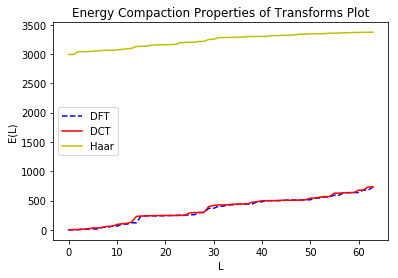

In [11]:
X = np.array(random.sample(range(100),64))
print("\nX: ", X)
plt.figure()
ydft = [0.]*64
ydct = [0.]*64
yhaar = [0.]*64
for L in range(64):
    ydft[L] = Energy_dft(X,L)
    ydct[L] = Energy_dct(X,L)
    yhaar[L] = Energy_haar(X,L) 
plt.title('Energy Compaction Properties of Transforms Plot')
plt.plot(range(64),ydft,'--b',label = "DFT")
plt.plot(range(64),ydct,'-r',label = 'DCT')
plt.plot(range(64),yhaar,'-y',label = 'Haar')
plt.legend(loc='center left')    
plt.xlabel("L")
plt.ylabel("E(L)")
plt.show()